In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("2019.csv")

# Display the first few rows of the dataset
df.head()


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [2]:
# Check for missing values
print(df.isnull().sum())

# Get general information about the dataset
df.info()

# Describe the data to get basic statistics
df.describe()

# Check for duplicates
print("Duplicate rows:", df.duplicated().sum())


Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-nul

In [5]:
df['Country or region'] = df['Country or region'].astype('category').cat.codes

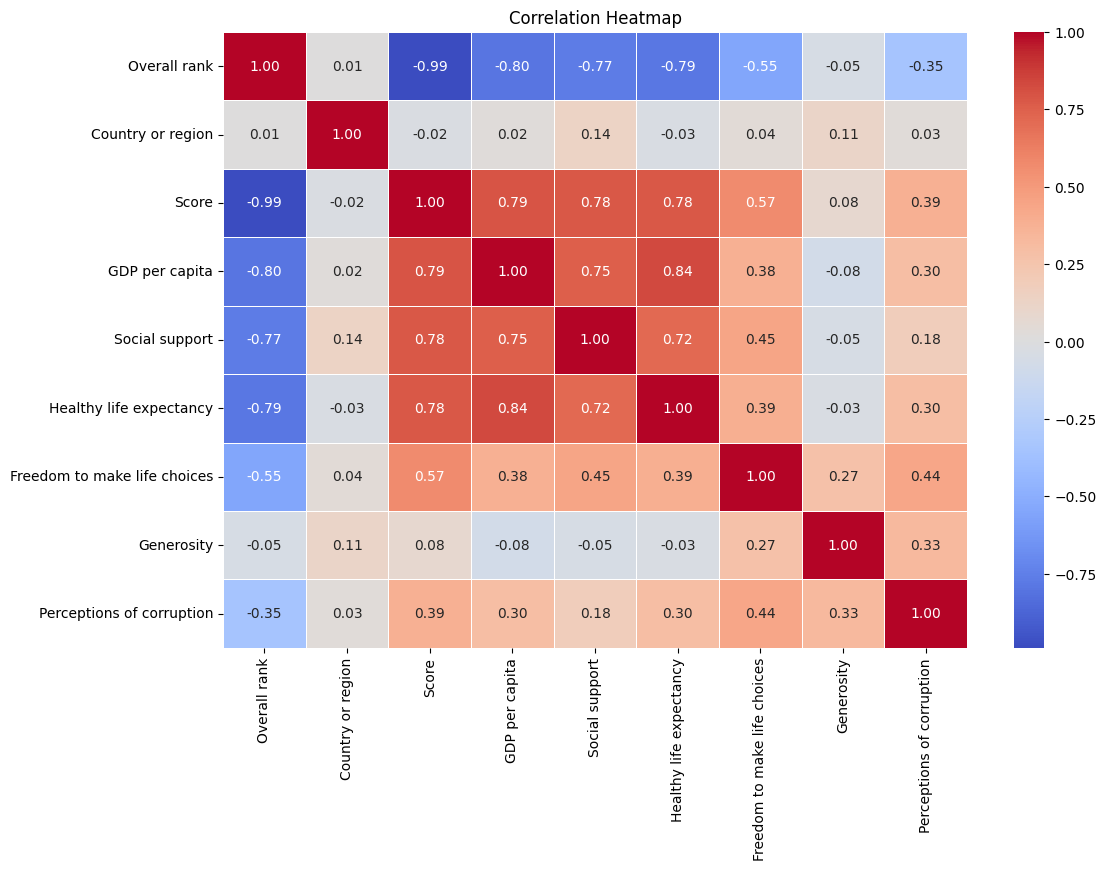

In [6]:
# Calculate correlation matrix
corr = df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [8]:
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,43,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,36,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,105,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,57,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,98,7.488,1.396,1.522,0.999,0.557,0.322,0.298


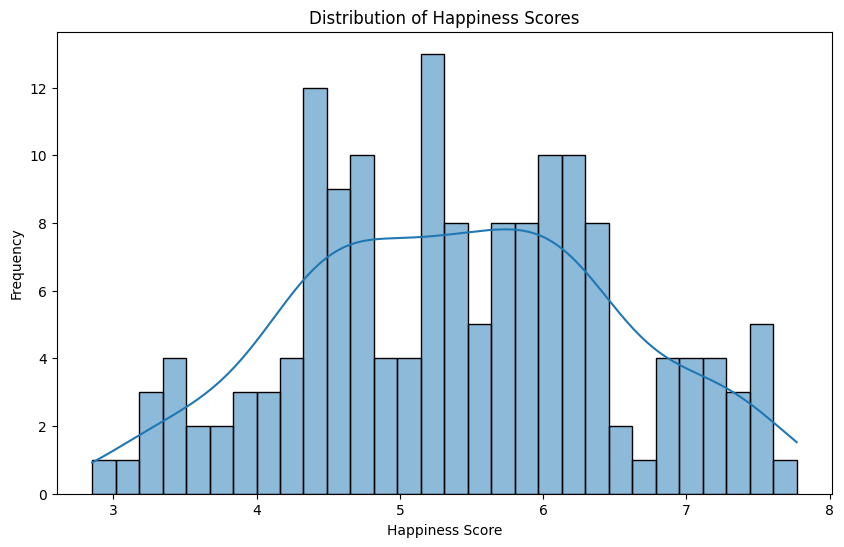

In [9]:
# Distribution of Happiness Scores
plt.figure(figsize=(10, 6))
sns.histplot(df['Score'], kde=True, bins=30)
plt.title('Distribution of Happiness Scores')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.show()

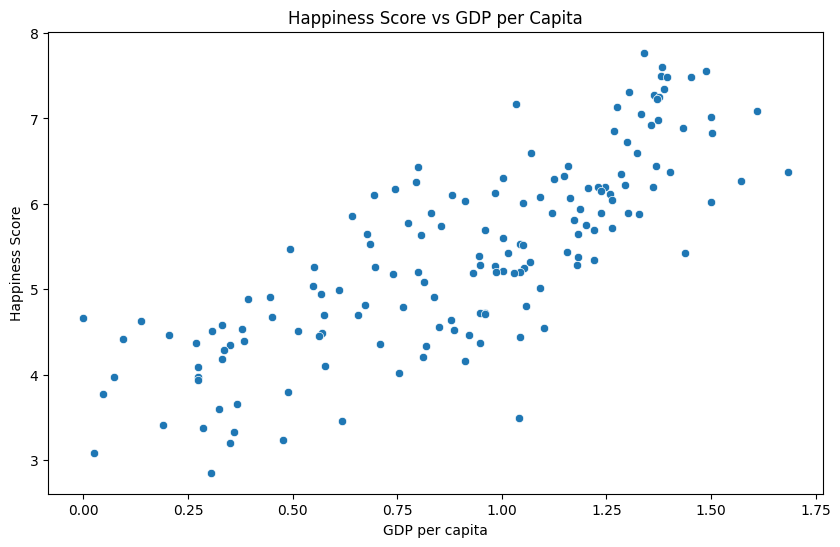

In [11]:
# Scatter plot between Happiness Score and GDP per Capita
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GDP per capita', y='Score', data=df)
plt.title('Happiness Score vs GDP per Capita')
plt.xlabel('GDP per capita')
plt.ylabel('Happiness Score')
plt.show()

<ipython-input-21-ebb3bc350ac9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Score', y='Country or region', data=top_countries, palette="viridis")  # Use original country names


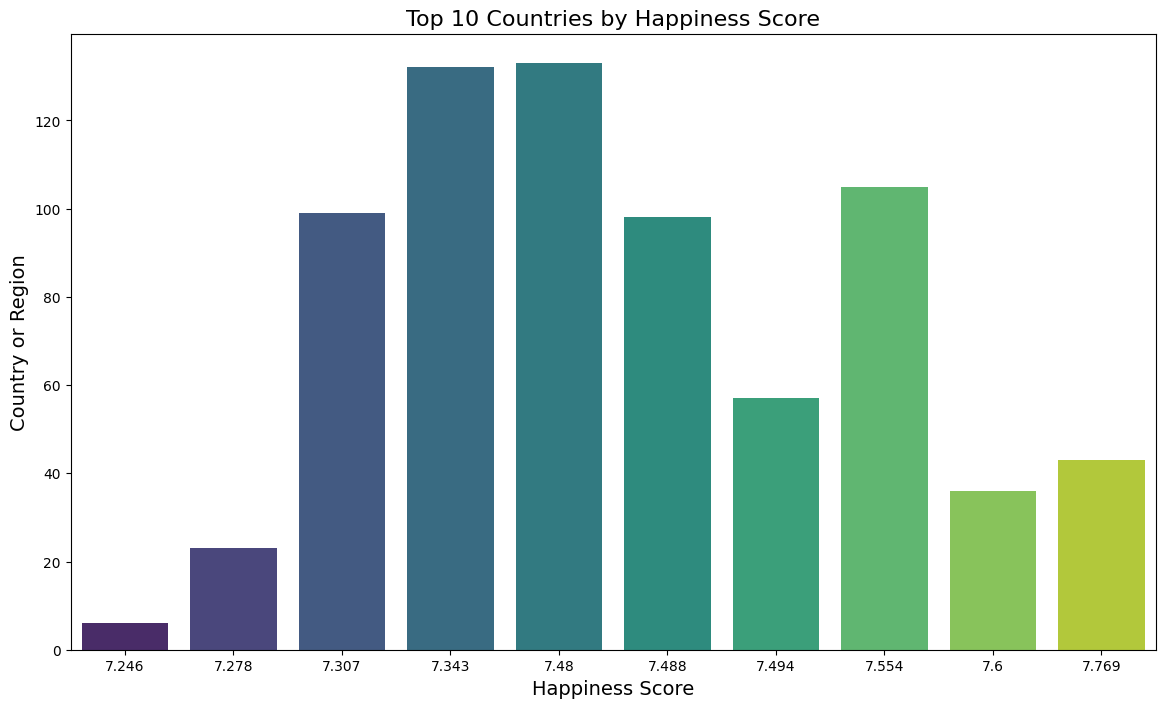

In [21]:
top_countries = df[['Country or region', 'Score']].sort_values(by='Score', ascending=False).head(10)

# Plotting the top 10 countries by Happiness Score using the 'Country or region' column
plt.figure(figsize=(14, 8))
sns.barplot(x='Score', y='Country or region', data=top_countries, palette="viridis")

plt.title('Top 10 Countries by Happiness Score', fontsize=16)
plt.xlabel('Happiness Score', fontsize=14)
plt.ylabel('Country or Region', fontsize=14)

plt.show()


In [24]:
# Prepare the features and target
X = df[['GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']]
y = df['Score']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 0.495462022879975
Mean Squared Error: 0.4144641383528352
R-squared: 0.6017537913445683


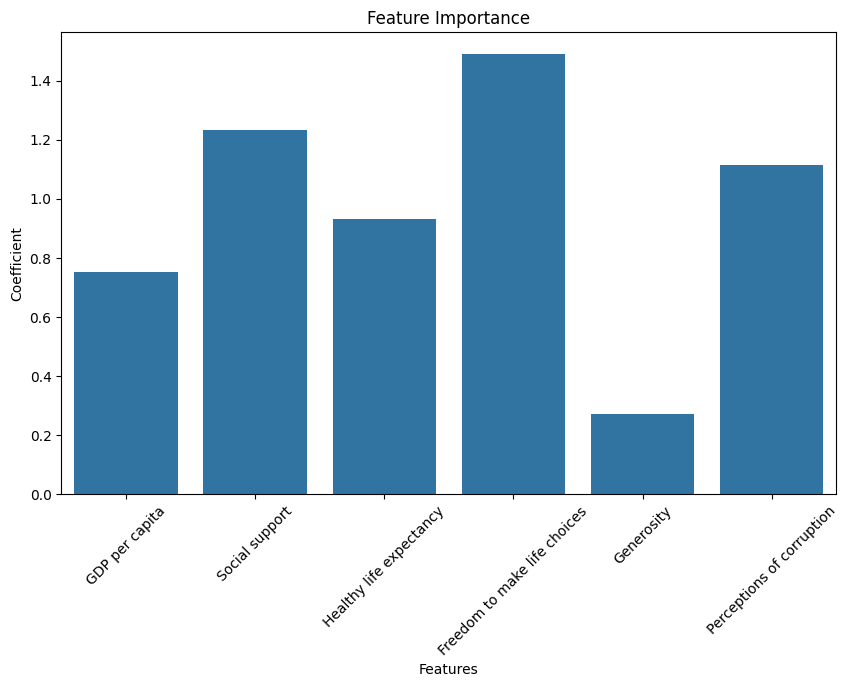

In [26]:
# Plot feature importance
importances = model.coef_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=features, y=importances)
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.xticks(rotation=45)
plt.show()
